# Исследование данных интернет-магазине «Стримчик»

В нашем распоряжении данные интернет-магазине «Стримчик». В распоряжении имеются сведения об исторических данных о продажах игр, оценки пользователей и экспертов, жанры и платформы.

Цель проекта - выявить определяющие успешность игры закономерности, для того чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Для этого нам предстоит изучить имеющиеся исходные данные, изучить содержание таблицы, проверить таблицу на наличие пропусков, соответствия типа данных и выявить дубли. Проанализировав таблицу, добавить необходимые столбцы для последующего анализа. Затем необходимо визуализировать и изучить информацию по нужным нам категориям, проверить данные на наличие аномальных и редких значений. 

Затем нужно оценить влияние на прибыльность оценок критиков и пользователей

Далее, проанализировав прибыльность по платформам, жанрам и зависимость от рейтинга, мы составим портрет пользователя каждого региона

На этапе проверки гипотез с помощью необходимых методов проверим принимаются нулевые гипотезы или нет. Полученные результаты отразим в выводах.


In [1]:
#Импорт необходимых бибилиотек
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats as st
import seaborn as sns

# Шаг 1. Загрузка и изучение данных

In [2]:
#Чтение файла
data = pd.read_csv('/datasets/games.csv')

#Вывод первых 20 строк
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Заголовки столбцов написаны с использованием разных регистров. В нескольких столбцах есть пропуски, причем можно заметить, что пропуски в одном столбце стооветствуют пропускам в другом

In [3]:
#Вывод общей информации о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В 6 столбцах из 11 имеются пропуски

In [4]:
#Вывод пропущенных значений для каждого столбца

data.isna().sum().sort_values(ascending=False)

Critic_Score       8578
Rating             6766
User_Score         6701
Year_of_Release     269
Name                  2
Genre                 2
Platform              0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
dtype: int64

Самое большое количество пропусков в столбце 'Critic_Score' - 8578, в столбцах 'Rating' и 'User_Score' количество пропусков примерно одинокого, возможно столбцы взаимосвязаны. Небольшое количество пропусков в столбце 'Year_of_Release' - 269. И по два пропуска в столбцах 'Name' и 'Genre' 

In [5]:
#Проверка на дубликаты
data.duplicated().sum()

0

In [6]:
#Проверка на неявные дубликаты по столбцам 'Name', 'Platform', 'Year_of_Release'
data.duplicated(['Name', 'Platform', 'Year_of_Release']).sum()

2

**Вывод**

После изучения имеющихся данных, можно отметить, что наименование столбцов написаны с использованием разного регистра. В 6 столбцах из 11 имеются пропуски. По первым строчкам можно заметить, что столбцы в которых встречаются пропуски, соотносятся друг с другом. В столбцах 'Name' и 'Genre' всего по два пропуска. Тип данных в столбце 'Year_of_Release' - float64.  Дубликатов строк в дата фрейме не обнаружено, но вместе с тем имеются две строки, где совпадает название игры, платформа и год выпуска

# Шаг 2. Предобработка данных

**Замена названия столбцов**

In [7]:
#Приведение названия столбцов к "змеиному" регистру
data.columns = data.columns.str.lower()

#Вывод наименования столбцов
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**Изменение типа данных**

В столбце 'year_of_release' указан год релиза, тип данных в столбце float. Т.к. в столбце содержится только год, без указания месяца и дня релиза, то тип данных в столбце можно перевести в int64. Также стоит обратить внимание на столбец 'User_Score', который имеет тип object, хотя должен содержать вещественные числа  

In [8]:
#Изменение типа данных в столбце 'year_of_release'
data['year_of_release'] = data['year_of_release'].astype('Int64')

#Вывод информации о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


**Обработка пропусков**

In [9]:
#Повторный вывод пропущенных значений для каждого столбца

data.isna().sum().sort_values(ascending=False)

critic_score       8578
rating             6766
user_score         6701
year_of_release     269
name                  2
genre                 2
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

In [10]:
#Вывод на экран пустых значений в столбце 'name'
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


**name** и **genre** (по 2 пропуска) - в данных столбца пропуски соотносятся друг с другом, т.к. мы не можем сами узнать название игры и ее жанр, эти строки можно будет удалить

**year_of_release** (269 пропусков) - заполнить пропуски в данном столбце без дополнительной информации, достаточно сложно, т.к., например, одна игра могла выйти на разных платформах в разные годы или из-за технической ошибки мог не проставится год выхода игры на одной из платформ, но мог корректно отобразится на других платформах, так же могут быть достаточно редкие игры год выхода которых сложно отследить. Ввиду небольшого количества пропусков в данном столбце относительно всего датафрейма их можно удалить

In [11]:
#Удаление пропусков в столбце 'name'
data = data.dropna(subset=['name'])

#Удаление пропусков в столбце 'year_of_release'
data = data.dropna(subset=['year_of_release'])

In [12]:
#Вывод уникальных значений столбца 'rating'
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [13]:
data['rating'] = data['rating'].fillna('No Rating')

**rating** (6766 пропускрв) - в столбце 'rating' указан возрастной рейтинг игр, который присваивается ассоциацией ESRB (Entertainment Software Rating Board). Данная ассоциация действует в Северной Америке, соответственно она указывает рейтинг для игр выходящих в данном регионе, т.о. если рейтинг не указан, то вероятнее всего ESRB не присваивала игре никакого рейтинга, поэтому пропуски в столбце 'rating' можно заменить на значение No Rating - рейтинг отсутствует 

In [14]:
#Вывод на экран пустых значений в столбце 'critic_score'
data[data['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,No Rating
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,No Rating
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,No Rating
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,No Rating
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,No Rating
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,No Rating
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,No Rating
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,No Rating
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,No Rating


**critic_score** (8578) и **user_score** (6701) - самые большие значения пропусков по столбцам, **critic_score** практически половина датафрейма. Можно обратить внимание, что пропуски в данных столбцах соотносятся друг с другом, т.е. пустые значения в столбцах для одних и тех же игр. Это можно объяснить тем, что рейтинги для игр стали составляться во второй половине 90х, когда видеоигры набрали массовую популярность и распространились по многим странам, соответственно рейтингов для игр до середины 90х не составлялись. Этим можно объяснить отсутствие рейтингов у таких популярных игр как Super Mario Bros. или Tetris. Так же оценки могут отсутствовать у редких или непопулярных игр, или игр, вышедших на непопулярных платформах, которые просто не оценили, как пользователи, так и критики. Наличие в таблице с пропусками игр 2016 года, можно объяснить тем, игры, вышедшие в этот период еще не успели оценить. В виду значительного объема пропусков и невозможности самостоятельно их заполнить, т.к. невозможно спрогнозировать какую оценку поставит пользователь или критик, эти пропуски остаются

**Изучение аббревиатуры 'tbd' в столбце с оценкой пользователей**

In [15]:
#Вывод уникальных значений столбца 'user_score'
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце 'user_score' встречается значение **tbd**. Данная аббревиатура затрагивает две IT-сферы: видеоигры и модель разработки программного обеспечения. **tbd** – это аббревиатура, которая означает фразу “To Be Determined”, то есть "Будет определено". Чаще всего tbd используется для обозначения неизвестной даты выхода. Посмотрим это значение в датафрейме  

In [16]:
#Вывод датафрейма по значению 'tbd'
data.loc[data['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Значение **tbd** всречается не только у новых игр но и у релизов вышедших задолго до 2016 года. Можно предположить, что **tbd** в отношении уже вышедших игр, может обозначать, что у игры готовится к релизу какое-либо дополнение, однако пока не известно, когда именно оно будет выпущено. Значение **tbd** в нашем датафрейме встречается в столбце 'user_score' и по сути обозначает неизвестность. Значение **tbd** можно заменить на значение NaN.

In [17]:
# Замена значения 'tbd' на значение 'NaN'
data['user_score'] = data['user_score'].replace('tbd', np.nan, regex=True)

#Замена значений столбца 'user_score' на тип float 
data['user_score'] = data['user_score'].astype(float)
#Вывод уникальных значений
data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

Значение **tbd** заменилось на **nan**. Заменили тип данных на float

In [18]:
#Подсчет пропусков в столбце 'user_score'
data['user_score'].isna().sum()

8981

Количество пропусков в столбце 'user_score' увеличелось на 2376, т.е. на замененное значение **tbd**

**Обработка неявных дублей**

In [19]:
#Замена дубликатов по столбцам 'name', 'platform', 'year_of_release'
data = data.drop_duplicates(['name', 'platform', 'year_of_release']).reset_index()

#Подсчет дубликатов после замены
data.duplicated(['name', 'platform', 'year_of_release']).sum()

0

**Посчитайте суммарные продажи во всех регионах и создание нового столбца**

In [20]:
#Создание столбца 'total_sale' с суммарными продажами
data['total_sale'] = data['na_sales'] + data['eu_sales']+ data['jp_sales']+data['other_sales']

#Вывод датафрейма после изменения
data

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,No Rating,40.24
2,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,No Rating,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16438,16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,No Rating,0.01
16439,16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,No Rating,0.01
16440,16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,No Rating,0.01
16441,16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,No Rating,0.01


In [21]:
# Расчитываем долю удаленных значений
deleted_values = (16715-16443)/16715 * 100
deleted_values

1.6272808854322462

Доля удаленных значений в датафрейме составила 1.62%

**Вывод по предобработке**

В имеющемся исходном датафрейме были приведены наименование столбцов в "змеиному" регистру. 

В столбце 'year_of_release' тип данных float был заменен на int64. т.к. в столбце содержится только год, без указания месяца и дня релиза

Ввиду небольшого количества, а также невозможностью заполнить без дополнительной информации, пропуски в столбцах 'name', 'genre' и 'year_of_release' были удалены. Имеющиеся пропуски в оставшихся столбцах было решено оставить

В столбце 'rating' пропуски были заменены на значение No Rating, т.к. отсутствие какого-либо значение означает, что рейтинг игре не присваивался

В столбце 'user_score' было обнаружено значение 'tbd'. Т.к. данное значение обозначает неизвестность, оно было заменено на значение NaN. Затем тип данных object был заменен на float

Были удалены неявные дубликаты по столбцам 'name', 'platform', 'year_of_release' одновременно

В датафрейм для бедующих расчетов был добавлен столбец 'total_sale' с суммарным значение продаж по всем регионам

Доля у удаленных значений после предобработки данных составила 1.62%


# Шаг 3. Исследовательский анализ 

**Количество выпускаемых игр в разные годы**

In [23]:
#вывод числового описания данных столбца 'year_of_release'
display(data['year_of_release'].describe())

count    16443.000000
mean      2006.485921
std          5.875546
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

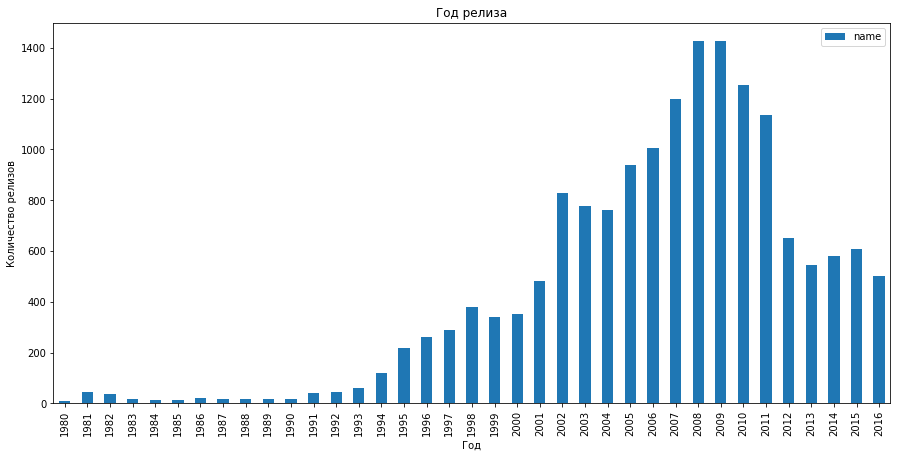

In [24]:
#Создание сводной таблицы по году релиза и их количеству
data_year_pivot = data.pivot_table(index='year_of_release', values='name', aggfunc='count')

#Создание графика
data_year_pivot.plot.bar(figsize=(15,7))
plt.title('Год релиза')
plt.xlabel('Год')
plt.ylabel('Количество релизов')
plt.show()

**Вывод**

Среднее и медианное значение примерно равны, 2006 и 2007 год соответственно. Данные в таблице предоставлены с 1980 года. Четверть всех релизов состоялась до 2003 года, а половина до 2007, т.е. за период с 2003 по 2007 год было выпущено столько же игр как за предыдущие 23 года и ещё столько же игр было выпущено за период с 2007 по 2010 год. По гистограмме видно, что количество выпускаемых игр начало расти начиная с 1995 года, в 2002 году произошел резкий скачек в количестве выпускаемых игр.  Пик выпускаемых игр приходится на период 2008-2009 года, около 1400 игр в год. В 2012 году наблюдается резкий спад в количестве релизов. Это можно объяснить появлением новых операционных систем (ios, android) и устройств, работающих на этих системах (смартфоны, планшеты)

**Продажи по платформам**

Для изучения прибыльности по платформам, необходимо сделать сводную таблицу по платформам и суммарной прибыльности

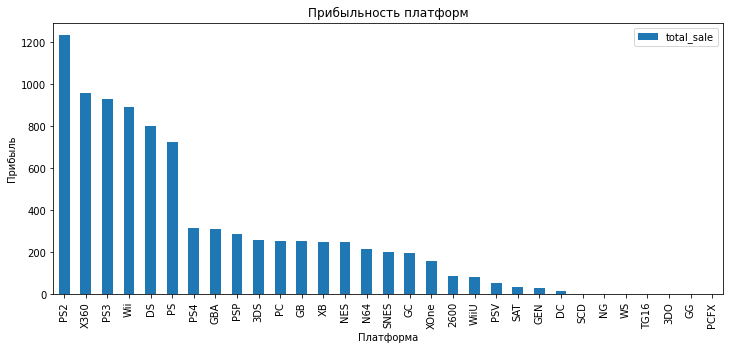

In [25]:
#Создание сводной таблицы платформ по прибольности
data_platform_sale = data.pivot_table(index='platform', values='total_sale', aggfunc='sum')

#Сортировка по убыванию прибольности
data_platform_sale = data_platform_sale.sort_values(by='total_sale', ascending=False)

#Создание графика
data_platform_sale.plot.bar(figsize=(12,5))
plt.title('Прибыльность платформ')
plt.xlabel('Платформа')
plt.ylabel('Прибыль')
plt.show()


**Вывод**

По графику можно заметить, что самой прибыльной платформой является PS2, заметно выделяясь на фоне остальных. Затем идут X360, PS3, Wii, DS, PS. Остальные платформы показывают заметно меньшую прибыльность. Идущая по графику следом за PS платформа PS4, показывает прибыльность приблизительно в 2 раза меньше

**Распределение платфлорм с самыми большими сумарными продажами по годам**

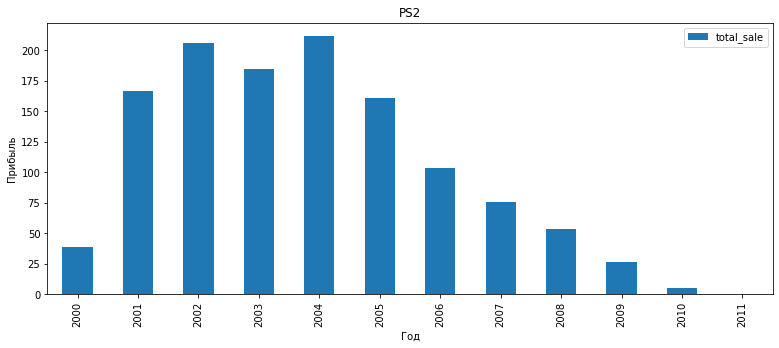

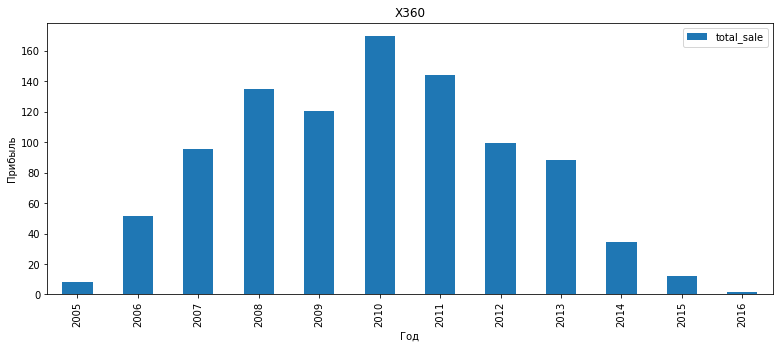

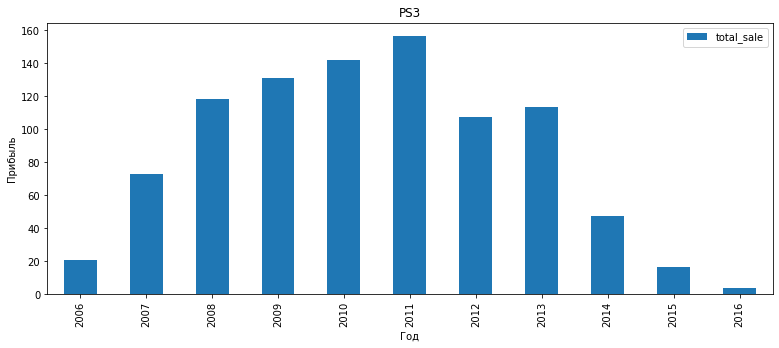

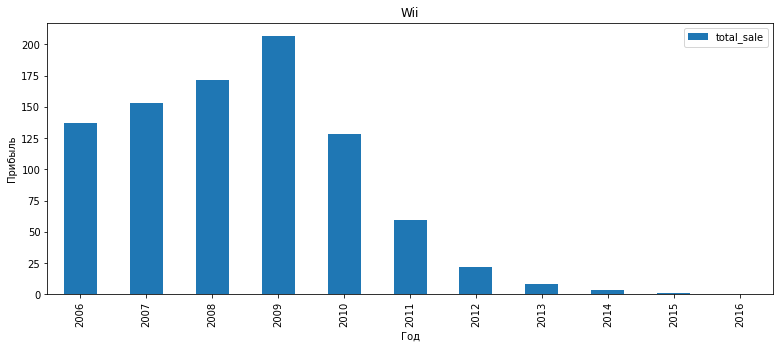

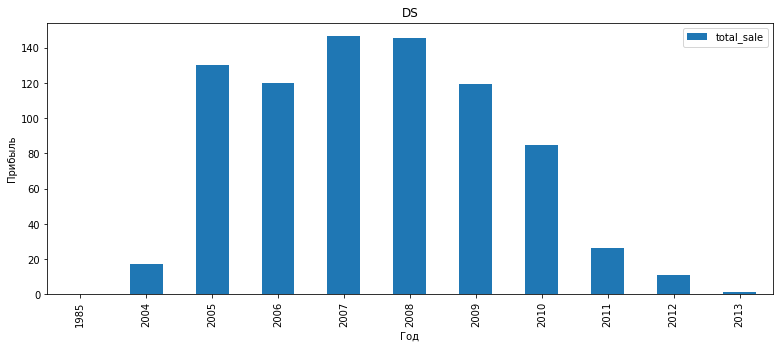

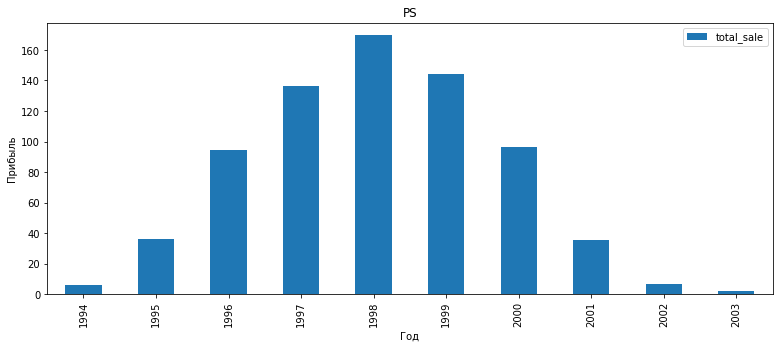

In [26]:
top_platforms_list =['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

for platform in top_platforms_list:
    data[data['platform'] == platform].pivot_table(index='year_of_release', values='total_sale', aggfunc='sum').plot(
        kind='bar', figsize=(13,5))
    plt.title(platform)
    plt.xlabel('Год')
    plt.ylabel('Прибыль')
    plt.show()

**Вывод**

**PS2** - Платформа была представлена в 2000 году. На следующий год после выхода PS2 прибыль выросла 4 раза по сравнению с годом выхода. Платформа показывала стабильно высокую прибыльность в период с 2001 по 2005 год. Было два пика с самой большой прибыльностью в 2002 и 2004 годах. Начиная с 2006 прибыльность начала снижаться каждый год. В последний год производства почти нулевая прибыльность

**X360** - Платформа была представлена в 2005 году. На следующий год после выхода X360 прибыль выросла 5 раза по сравнению с годом выхода. Платформа показывала стабильно высокую прибыльность в период с 2008 по 2011 год. Пиковое значение прибыльности приходится на 2010 год. После 2013 года замечено резкое снижение прибыльности. В последний год производства почти нулевая прибыльность

**PS3** - Платформа была представлена в 2006 году. На следующий год после выхода X360 прибыль выросла 3,5 раза по сравнению с годом выхода. Платформа показывала стабильно высокую прибыльность в период с 2008 по 2013 год. Пиковое значение прибыльности приходится на 2011 год. После 2013 года замечено резкое снижение прибыльности. В последний год производства почти нулевая прибыльность. Можно отметить, что платформа появилась, в момент, когда высокую прибыльность показывала предыдущая версия платформы. Динамика снижения прибыльности PS2 соотносится с динамикой повышения прибыльности PS3, хотя суммарный общий доход PS2 выше

**Wii** - Платформа была представлена в 2006 году. Можно отметить, что на следующий год была чуть выше чем в год выхода. В целом прибыльность росла не слишком большими темпами. Пик прибыльности приходится на 2009 год, после чего начинается резкий спад, последние три года существования платформа показывала нулевую прибыльность. Такая динамика объясняется выходом в этот же год PS3, т.е. появление прямого конкурента, который забрал большую часть прибыльности

**DS** - Платформа была представлена в 2004 году, хотя на графике и есть значение 1985 год с нулей прибыльностью (возможно техническая ошибка). На следующий год после выхода DS прибыль выросла 6 раза по сравнению с годом выхода и держалась на таком уровне 2009 года, после чего началось снижение. Пик прибыльности приходится на 2007 и 2008 год. В последний год производства почти нулевая прибыльность

**PS** - Платформа была представлена в 1994 году. На следующий год после выхода X360 прибыль выросла 4 раза по сравнению с годом выхода. На следующий год прибыльность выросла ещё в 2,5 раза. Платформа показывала стабильно высокую прибыльность в период с 1996 по 2000 год. Пиковое значение прибыльности приходится на 1998 год. После 2000 года замечено резкое снижение прибыльности. В последний год производства почти нулевая прибыльность


**Срок появления новых платформ**

Проанализировав Топ 6 платформ по прибыльности можно выявить общие тенденции:

- Средний срок существования платформы приблизительно составляет 10 лет

- Как правило на следующий год после выхода наблюдается значительный рост прибыльности

- Период стабильно высокой прибыльности составляет приблизительно 5 лет, после чего начинается снижение

На примере платформ PS можно проследить за какой срок появляются новые платформы. PS появилась 1994, PS2 в 2000, PS3 в 2006, таким образом срок появления новых платформ составляет 6 лет, новая версия платформы выходит, в момент, когда начинается снижение прибыльности предыдущей версии, но прибыльность ещё достаточно высокая
  

**Выбор актуального периода**

По приведенным ранее гистограмме можно заметить, что за период с 1980 по 2016 год рынок компьютерных игр очень сильно менялся с роста начиная с середины 90х и спада после пиковых значений на рубеже 2010 годов. Так же можно заметить, что после 2013 года у платформ PS3 и X360 начался значительный спад в прибыли, от части связанный с появлением новых версий данных платформ в 2013 году. Учитывая, это, а также строк существования платформ в 7 лет, для актуального периоду будет целесообразным считать период после 2013 года, т.е. анализировать период высокой прибыльности самых новых версий популярных платформ

In [28]:
#Создание среза по актуальному периоду
data_period = data[data['year_of_release'] > 2013].reset_index()
#Вывод вновь созданного датафрейма
data_period

,level_0,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
0,31,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,No Rating,14.63
1,42,42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,47,47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,No Rating,11.68
3,77,77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,87,87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,No Rating,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1684,16431,16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,No Rating,0.01
1685,16435,16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,No Rating,0.01
1686,16438,16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,No Rating,0.01
1687,16440,16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,No Rating,0.01


In [29]:
data_period['platform'].value_counts()

PS4     376
PSV     295
XOne    228
PS3     219
3DS     212
PC      151
X360    111
WiiU     73
PSP      13
Wii      11
Name: platform, dtype: int64

**Лидеры продаж. Потенциально прибыльные платформы**

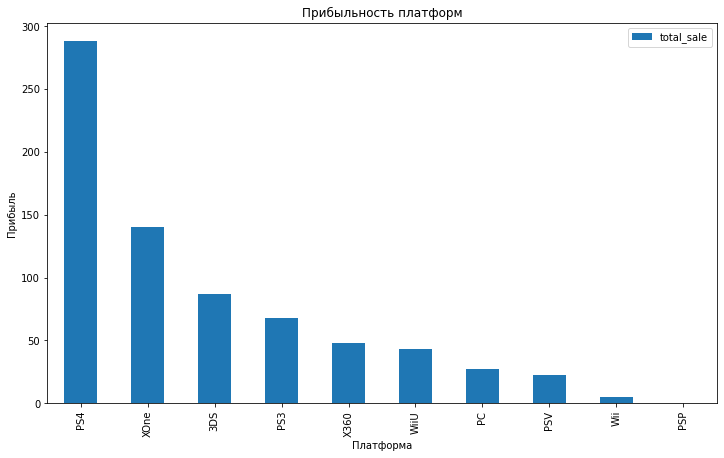

In [30]:
#Создание сводной таблицы платформ по прибольности за выбранный период
data_period_platform_sale = data_period.pivot_table(index='platform', values='total_sale', aggfunc='sum')

#Сортировка по убыванию прибольности
data_period_platform_sale = data_period_platform_sale.sort_values(by='total_sale', ascending=False)

#Создание графика
data_period_platform_sale.plot.bar(figsize=(12,7))
plt.title('Прибыльность платформ')
plt.xlabel('Платформа')
plt.ylabel('Прибыль')
plt.show()

In [31]:
#Вывод уникальных значений платформ в датафрейме
data_period['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

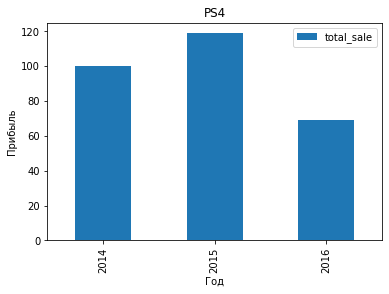

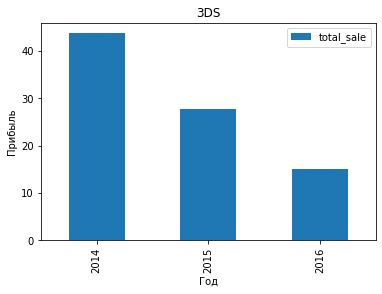

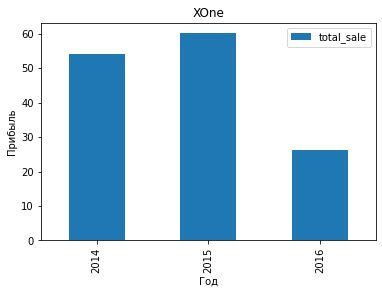

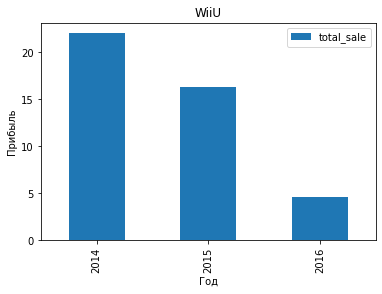

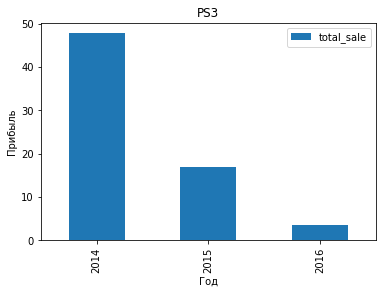

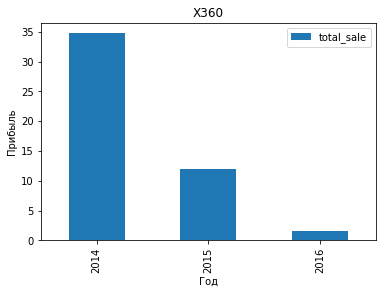

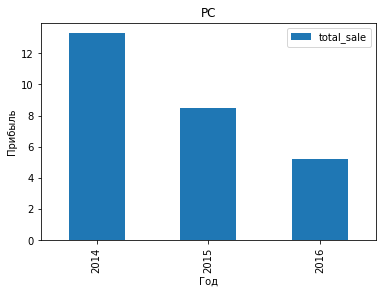

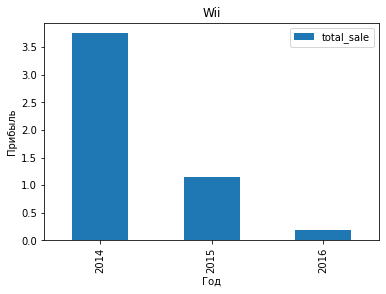

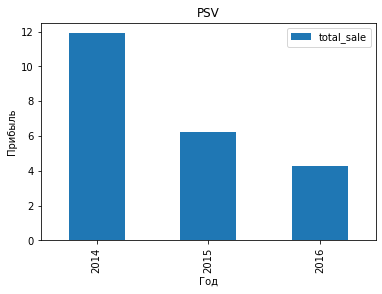

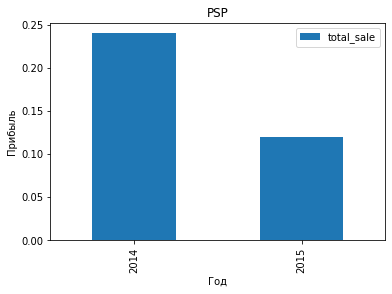

In [32]:
#Создание списка наименования платформ
platforms_list = data_period['platform'].unique()

#Создание функции для вывода графика каждой платформы
for platform in platforms_list:
    data_period[data_period['platform'] == platform].pivot_table(index='year_of_release', values='total_sale', aggfunc='sum').plot(
        kind='bar')
    plt.title(platform)
    plt.xlabel('Год')
    plt.ylabel('Прибыль')
    plt.show()

**Вывод**

Самая высокая прибыль за актуальный период у PS4. Следом идут XOne и 3DS, т.е. новые версии популярных платформ. Также стоит отметить, что в топ 5 по прибыльности входят предыдущие версии платформ PS и Xbox. Затем идет платформа WiiU, хотя для данной платформы сравнительное небольшое количество релизов, вероятнее всего это связанно со стоимостью игр для платформы. Стоит отметить снижение прибыльности от игр для ПК, хотя прибыльность от них остается выше чем от партитивных консолей PSV. Спад по играм PC можно объяснить развитием мобильных технологий и развитием консольных игр. 

Для дальнейшего анализа можно отсечь предыдущие версии платформ, учитывая снижение прибыльности от них, и делать анализ по последним версиям, а также PC. Таким образом дальнейший анализ проводится по платформам PS4, XOne, 3DS, WiiU, PC, PSV   


**Продажи игр по платформам. «Ящик с усами»**

In [33]:
#Группировка датафрейма по платформам
data_period_group = data_period.groupby('platform')

#Вывод числовых значений столбца 'total_sale' по платформам
display(data_period_group['total_sale'].describe())


,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
PSP,13.0,0.027692,0.027735,0.01,0.0100,0.020,0.0200,0.09
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
Wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28


По всем платформам максимальное значение прибыльности значительно выше среднего и медианного значения, т.е. в данных есть значительные выбросы

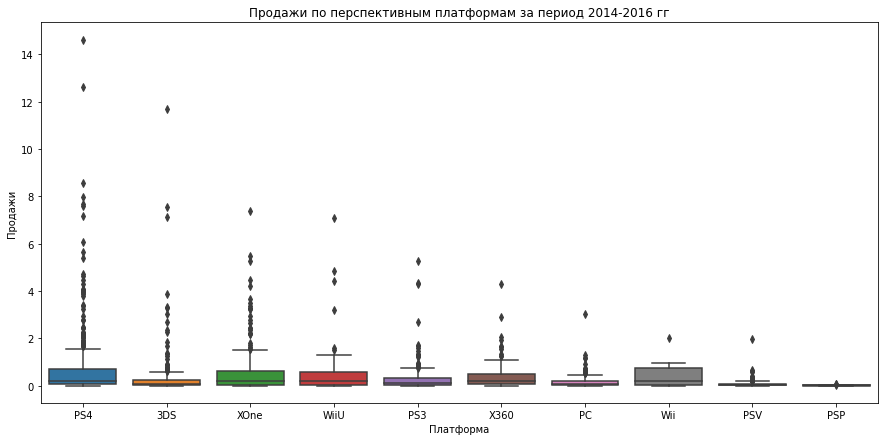

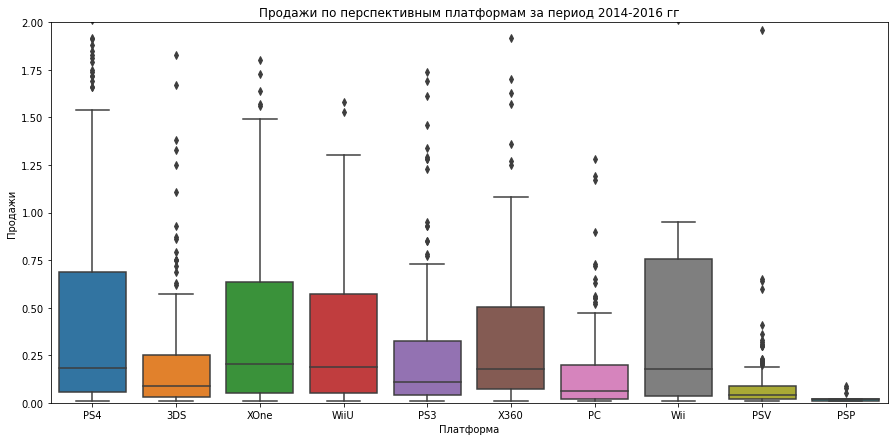

In [34]:
#Вывод "Ящиков с усами"
plt.figure(figsize=(15,7))
sns.boxplot(data=data_period,x='platform', y='total_sale')
plt.title('Продажи по перспективным платформам за период 2014-2016 гг')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()


plt.figure(figsize=(15,7))
sns.boxplot(data=data_period,x='platform', y='total_sale')
plt.title('Продажи по перспективным платформам за период 2014-2016 гг')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.ylim([0,2])
plt.show()


**Вывод**

По "Ящику с усами" видно, что у каждой платформы есть выбросы, причем у PS4 и 3DS есть отдельные, очень большие значения. Медианное значение по каждой платформе также разное, т.е. продажи по платформам различаются. Самое высокое медианное значение у XOne, т.е. игры для платформы прибыльнее остальных. Медианное значение PS4и WiiU приблизительно равны, но стоит отметить, что у  WiiU меньше всего выбросов, а также меньшее количество продаж, т.е. игры для WiiU самы дорогие. PS4 на первом месте по количеству продаж, следом идет PSV, но по прибыльности она показывает один из худших результатов

**Оценка влияния на продажи внутри одной популярной платформы отзывов пользователей и критиков**

Для оценки прибыльности внутри одной популярной платформы возьмем PS4, т.к. у нее самая боольшая прибыльность

-0.048901696795305656

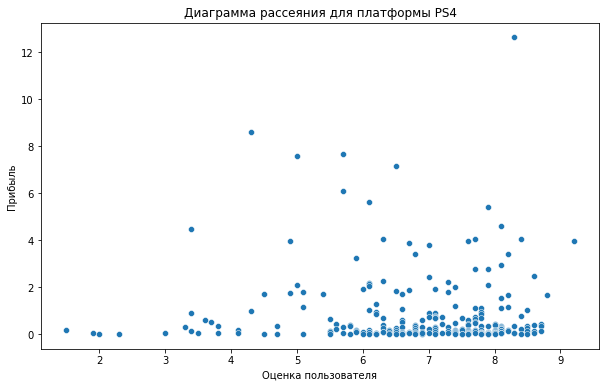

In [35]:
#Создание таблицы для платформы PS4
data_period_ps = data_period[data_period['platform']=='PS4']

#Постройка диаграммы рассеяния
plt.figure(figsize=(10,6))
sns.scatterplot(x='user_score', y='total_sale', data=data_period_ps)
plt.title('Диаграмма рассеяния для платформы PS4')
plt.xlabel('Оценка пользователя')
plt.ylabel('Прибыль')

#Считаем коэффициент корреляции Пирсона
data_period_ps['user_score'].corr(data['total_sale'])

Коэффициент Пирсона для прибыльности платформы PS4 и оценки пользователя составляет - 0.05, т.е. имеем очень слабую отрицательную корреляцию. Нельзя сделать вывод о какой-либо зависимости прибыльности от оценки пользователя

0.40632723012582295

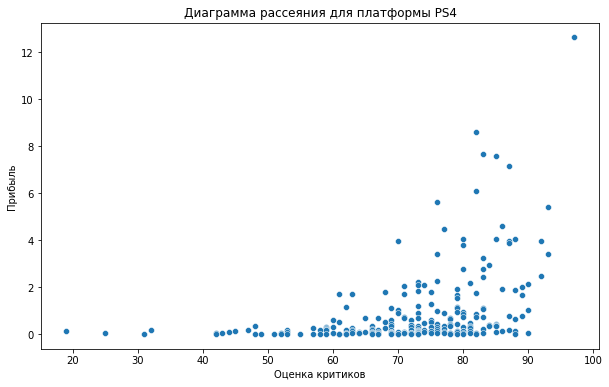

In [36]:
#Постройка диаграммы рассеяния
plt.figure(figsize=(10,6))
sns.scatterplot(x='critic_score', y='total_sale', data=data_period_ps)
plt.title('Диаграмма рассеяния для платформы PS4')
plt.xlabel('Оценка критиков')
plt.ylabel('Прибыль')

#Рассчет коэффициент корреляции Пирсона
data_period_ps['critic_score'].corr(data['total_sale'])

Коэффициент Пирсона для прибыльности платформы PS4 и оценки критиков составляет 0.4, т.е. имеем слабую положительную корреляцию. Оценки критиков не сильно, но влияют на прибыльность платформы

**Вывод**

Коэффицент Пирсона показал, что оценки критиков имеют большее влияние на прибыльность платформы PS4, чем оценки пользователей. Коэффициент показал, что нельзя утверждать о какой-либо зависимость прибыльности PS4 от оценки пользователей, оценка критиков влияет на прибыльность PS4, но достаточно слабо 

**Соотнесение выводов о продажах на PS4 с продажами игр на других платформах**

Для соотнесения выводов по влиянию оценок пользователей и критиков на продажи платформы PS4, проверим данные на оставшихся платформах, ранее выбранных для проведения исследования

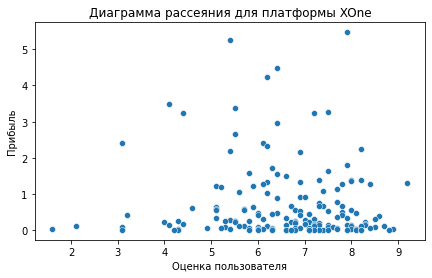

Коэффициент корреляции Пирсона: -0.06216397682983682


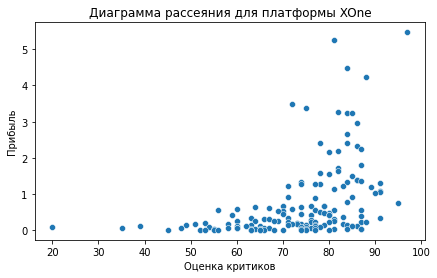

Коэффициент корреляции Пирсона: 0.4437775404615713


In [96]:
#Создание таблицы для платформы XOne
data_period_xone = data_period[data_period['platform']=='XOne']

#Постройка диаграммы рассеяния
plt.figure(figsize=(7,4))
sns.scatterplot(x='user_score', y='total_sale', data=data_period_xone)
plt.title('Диаграмма рассеяния для платформы XOne')
plt.xlabel('Оценка пользователя')
plt.ylabel('Прибыль')
plt.show()

#Считаем коэффициент корреляции Пирсона
print('Коэффициент корреляции Пирсона:', data_period_xone['user_score'].corr(data['total_sale']))

#Постройка диаграммы рассеяния
plt.figure(figsize=(7,4))
sns.scatterplot(x='critic_score', y='total_sale', data=data_period_xone)
plt.title('Диаграмма рассеяния для платформы XOne')
plt.xlabel('Оценка критиков')
plt.ylabel('Прибыль')
plt.show()

#Считаем коэффициент корреляции Пирсона
print('Коэффициент корреляции Пирсона:', data_period_xone['critic_score'].corr(data['total_sale']))


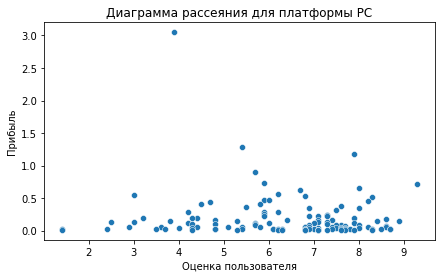

Коэффициент корреляции Пирсона: -0.055730417122391254


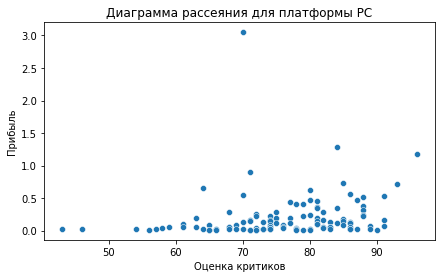

Коэффициент корреляции Пирсона: 0.25056421047316446


In [97]:
#Создание таблицы для платформы PC
data_period_pc = data_period[data_period['platform']=='PC']

#Постройка диаграммы рассеяния
plt.figure(figsize=(7,4))
sns.scatterplot(x='user_score', y='total_sale', data=data_period_pc)
plt.title('Диаграмма рассеяния для платформы PC')
plt.xlabel('Оценка пользователя')
plt.ylabel('Прибыль')
plt.show()

#Считаем коэффициент корреляции Пирсона
print('Коэффициент корреляции Пирсона:',data_period_pc['user_score'].corr(data['total_sale']))

#Постройка диаграммы рассеяния
plt.figure(figsize=(7,4))
sns.scatterplot(x='critic_score', y='total_sale', data=data_period_pc)
plt.title('Диаграмма рассеяния для платформы PC')
plt.xlabel('Оценка критиков')
plt.ylabel('Прибыль')
plt.show()

#Считаем коэффициент корреляции Пирсона
print('Коэффициент корреляции Пирсона:', data_period_pc['critic_score'].corr(data['total_sale']))


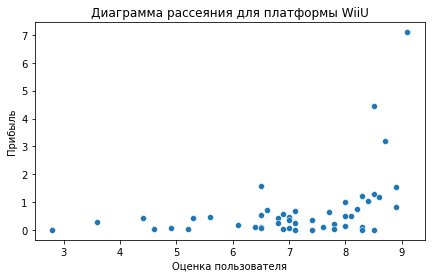

Коэффициент корреляции Пирсона: 0.4185074557070386


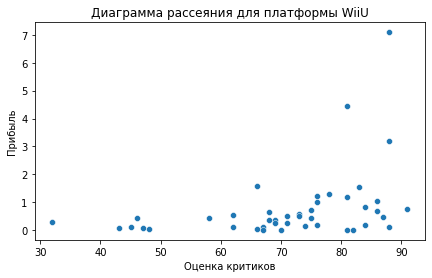

Коэффициент корреляции Пирсона: 0.38340991447164074


In [98]:
#Создание таблицы для платформы WiiU
data_period_wiiu = data_period[data_period['platform']=='WiiU']

#Постройка диаграммы рассеяния
plt.figure(figsize=(7,4))
sns.scatterplot(x='user_score', y='total_sale', data=data_period_wiiu)
plt.title('Диаграмма рассеяния для платформы WiiU')
plt.xlabel('Оценка пользователя')
plt.ylabel('Прибыль')
plt.show()

#Считаем коэффициент корреляции Пирсона
print('Коэффициент корреляции Пирсона:', data_period_wiiu['user_score'].corr(data['total_sale']))

#Постройка диаграммы рассеяния
plt.figure(figsize=(7,4))
sns.scatterplot(x='critic_score', y='total_sale', data=data_period_wiiu)
plt.title('Диаграмма рассеяния для платформы WiiU')
plt.xlabel('Оценка критиков')
plt.ylabel('Прибыль')
plt.show()

#Считаем коэффициент корреляции Пирсона
print('Коэффициент корреляции Пирсона:', data_period_wiiu['critic_score'].corr(data['total_sale']))


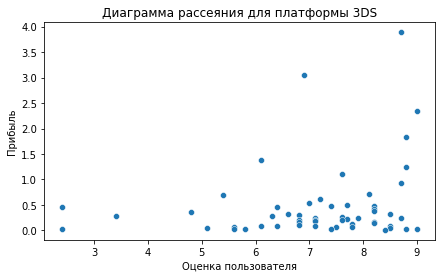

Коэффициент корреляции Пирсона: 0.21274355916764656


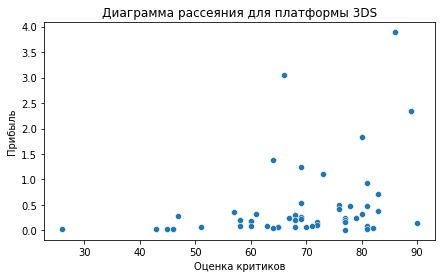

Коэффициент корреляции Пирсона: 0.3504077700954715


In [100]:
#Создание таблицы для платформы 3DS
data_period_3ds = data_period[data_period['platform']=='3DS']

#Постройка диаграммы рассеяния
plt.figure(figsize=(7,4))
sns.scatterplot(x='user_score', y='total_sale', data=data_period_3ds)
plt.title('Диаграмма рассеяния для платформы 3DS')
plt.xlabel('Оценка пользователя')
plt.ylabel('Прибыль')
plt.show()

#Считаем коэффициент корреляции Пирсона
print('Коэффициент корреляции Пирсона:',data_period_3ds['user_score'].corr(data['total_sale']))

#Постройка диаграммы рассеяния
plt.figure(figsize=(7,4))
sns.scatterplot(x='critic_score', y='total_sale', data=data_period_3ds)
plt.title('Диаграмма рассеяния для платформы 3DS')
plt.xlabel('Оценка критиков')
plt.ylabel('Прибыль')
plt.show()

#Считаем коэффициент корреляции Пирсона
print('Коэффициент корреляции Пирсона:',data_period_3ds['critic_score'].corr(data['total_sale']))

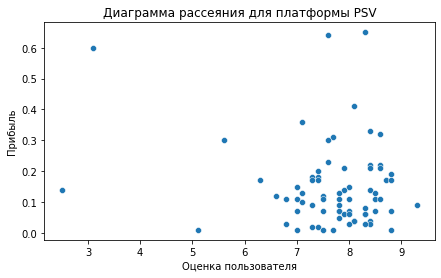

Коэффициент корреляции Пирсона: -0.14077094081222416


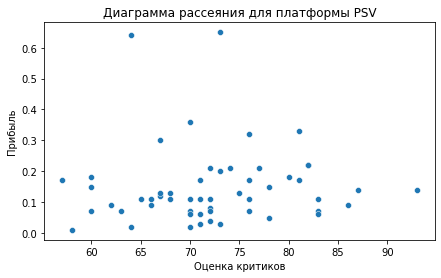

Коэффициент корреляции Пирсона: 0.09158016564081371


In [101]:
#Создание таблицы для платформы PSV
data_period_psv = data_period[data_period['platform']=='PSV']

#Постройка диаграммы рассеяния
plt.figure(figsize=(7,4))
sns.scatterplot(x='user_score', y='total_sale', data=data_period_psv)
plt.title('Диаграмма рассеяния для платформы PSV')
plt.xlabel('Оценка пользователя')
plt.ylabel('Прибыль')
plt.show()
#Считаем коэффициент корреляции Пирсона
print('Коэффициент корреляции Пирсона:',data_period_psv['user_score'].corr(data['total_sale']))

#Постройка диаграммы рассеяния
plt.figure(figsize=(7,4))
sns.scatterplot(x='critic_score', y='total_sale', data=data_period_psv)
plt.title('Диаграмма рассеяния для платформы PSV')
plt.xlabel('Оценка критиков')
plt.ylabel('Прибыль')
plt.show()

#Считаем коэффициент корреляции Пирсона
print('Коэффициент корреляции Пирсона:',data_period_psv['critic_score'].corr(data['total_sale']))

**Вывод**

Корреляция влияния оценок пользователей и критиков по платформе XOne, практически такая же, как и у платформы PS4 (Самые популярные платформы). Диаграммы рассеяния по данным платформам также очень похожи. У платформы PC влияние оценок критиков слабее, чем у PS4 и Xbox. У Платформы 3DS влияние оценок пользователей близко к влиянию оценок критиков. Платформа WiiU выделяется тем, что оценки пользователей влияют на прибыльность больше чем оценки критиков, а на платформы PSV практически отсутствует какое-либо влияние оценок как критиков, так и пользователей. Таким образом у двух самым популярных платформ PS4  и XOne влияние оценок критиков и пользователей очень практически одинаковое

**Распределение игр по жанрам**

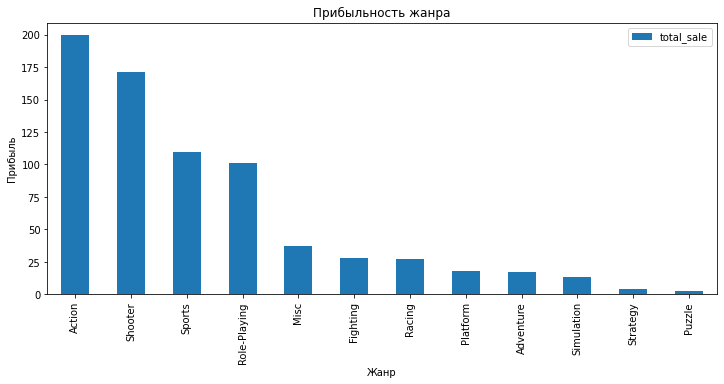

In [46]:
#Создание сводной таблицы прибыльности по жанрам за выбранный период
data_genre_sale = data_period.pivot_table(index='genre', values='total_sale', aggfunc='sum')

#Сортировка по убыванию прибольности
data_genre_sale = data_genre_sale.sort_values(by='total_sale', ascending=False)

#Создание графика
data_genre_sale.plot.bar(figsize=(12,5))
plt.title('Прибыльность жанра')
plt.xlabel('Жанр')
plt.ylabel('Прибыль')
plt.show()


In [47]:
#Группировка датафрейма по genre
data_period_group_genre = data_period.groupby('genre')

#Вывод числовых значений столбца 'total_sale' по жанрам
display(data_period_group_genre['total_sale'].describe())

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,619.0,0.322068,0.798181,0.01,0.0300,0.090,0.2800,12.62
Adventure,185.0,0.094865,0.203147,0.01,0.0200,0.030,0.0800,1.66
Fighting,60.0,0.470333,1.188053,0.01,0.0600,0.125,0.3200,7.55
Misc,113.0,0.332301,0.736999,0.01,0.0300,0.090,0.3200,5.27
Platform,38.0,0.476053,0.722561,0.01,0.0625,0.140,0.4675,3.21
Puzzle,14.0,0.157857,0.320629,0.01,0.0200,0.045,0.1000,1.19
Racing,69.0,0.398841,0.963716,0.01,0.0300,0.090,0.2500,7.09
Role-Playing,221.0,0.459005,1.177284,0.01,0.0500,0.110,0.3600,11.68
Shooter,128.0,1.335469,2.050567,0.01,0.1725,0.515,1.6175,14.63


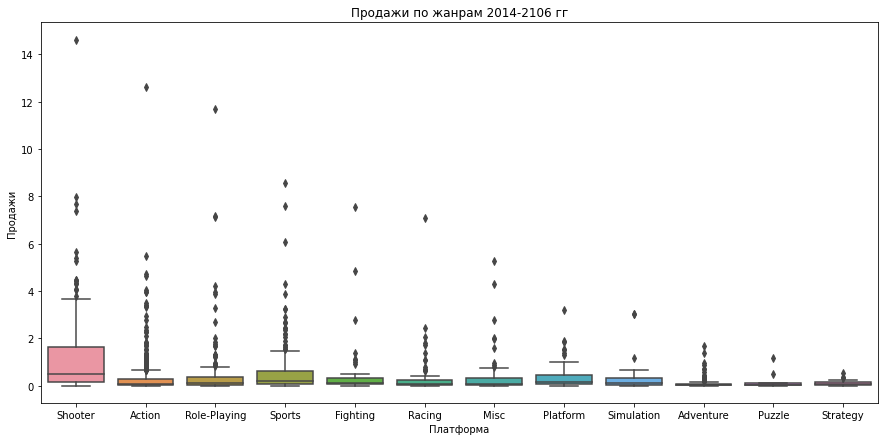

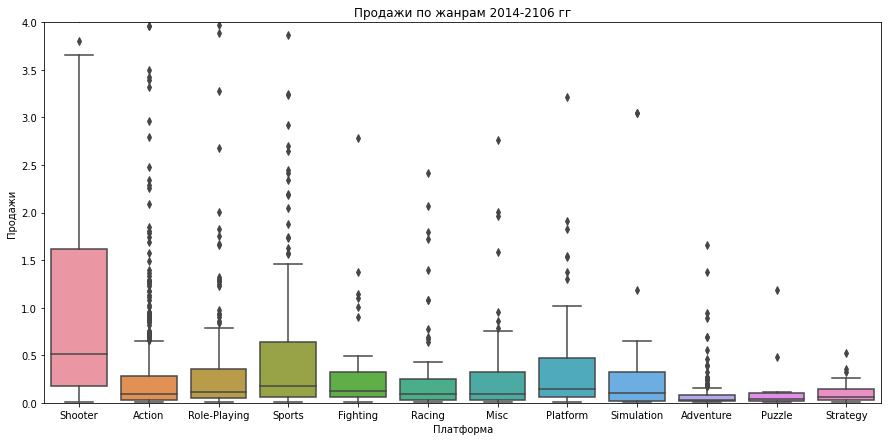

In [48]:
#Вывод диаграммы размаха
plt.figure(figsize=(15,7))
sns.boxplot(data=data_period,x='genre', y='total_sale')
plt.title('Продажи по жанрам 2014-2106 гг')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()


plt.figure(figsize=(15,7))
sns.boxplot(data=data_period,x='genre', y='total_sale')
plt.title('Продажи по жанрам 2014-2106 гг')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.ylim([0,4])
plt.show()

**Вывод**

Жанр Shooter сильно выделяется на фоне остальных жанров. Его медианное значение самое высокое, даже не смотря на то, что количество представленных игр в данном жанре, в несколько раз меньше чем Action и Role-Playing, т.е. в данный жанр очень популярен, а также в нем могут присутствовать очень дорогие игры. Во всех жанрах присутствуют выбросы. Самые большие в Shooter, Action и Role-Playing, т.е. в данных жанрах были игры, которые сделали очень большую выручку. Так же стоит отметить жанр Sports, где медианное значение, следующее после жанра Shooter. Таким образом, можно сделать вывод, что максимальные продажи не говорят о максимальной прибыльности

**Вывод по исследовательскому анализу данных**

Имеющиеся в датасете данные предоставлены с 1980 года. Количество выпускаемых игр начало расти начиная с середины 90х. Половина всех релизов, представленных в датасете состоялась до 2007. Пик выпускаемых игр приходится на на период 2008-2009 года. В 2012 году наблюдается резкий спад в количестве релизов, возможно связанный с появлением новых операционных систем (ios, android) и устройств, работающих на этих системах (смартфоны, планшеты)

Самой прибыльной платформой за всё время является PS2, затем идут X360, PS3, Wii, DS, PS. Средний срок существования платформы составляет 7 лет. На следующий год после выхода новой платформы наблюдается значительный рост прибыльности. Период стабильно высокой прибыльности составляет 5 лет, после чего начинается снижение, связанное в том числе с выходом новой версии платформы. Срок появления новых платформ составляет 6 лет

По приведенным ранее гистограмме можно заметить, что за период с 1980 по 2016 год рынок компьютерных игр очень сильно менялся с роста начиная с середины 90х и спада после пиковых значений на рубеже 2010 годов. Так же можно заметить, что после 2013 года у платформ PS3 и X360 начался значительный спад в прибыли, от части связанный с появлением новых версий данных платформ в 2013 году. Учитывая, это, а также строк существования платформ в 7 лет, для актуального периоду будет целесообразным считать период после 2013 года, т.е. анализировать период высокой прибыльности самых новых версий популярных платформ


В связи с тем, что за период с 1980 по 2016 год рынок компьютерных игр очень сильно менялся, а также учитывая, что строк существования платформ в 7 лет, для актуального периоду будет целесообразным считать период после 2013 года, т.е. анализировать период высокой прибыльности самых новых версий популярных платформ. 

Самая высокая прибыль за актуальный период у PS4. Следом идут XOne и 3DS, т.е. новые версии популярных платформ. Также стоит отметить, что в топ 5 по прибыльности входят предыдущие версии платформ PS и Xbox. Для дальнейшего анализа были выбраны новые последние версии популярных платформ, по которым наблюдается высокая прибыльность. Таким образом дальнейший анализ проводился по платформам PS4, XOne, 3DS, WiiU, PC, PSV

После анализа медианного значения по каждой платформе, можно заметить, что продажи по платформам различаются. Самое высокое медианное значение у XOne, т.е. игры для платформы прибыльнее остальных. Медианное значение PS4и WiiU приблизительно равны, но стоит отметить, что у WiiU меньше всего выбросов, а также меньшее количество продаж, т.е. игры для WiiU самые дорогие. PS4 на первом месте по количеству продаж, следом идет PSV 

С помощью коэффициента Пирсона установлено, что оценки пользователей не оказывают никакого влияния на прибыльность таких платформ как PS4, XOne, PC, но вместе с тем оценки критиков слабо, но влияют на прибыльность данных платформ. На платформа PSV оценки критиков слабее влияют на прибыльность, чем на ранее рассмотренных платформах. Платформа WiiU выделяется на фоне остальных - оценка критиков влияет на прибыльность также, как и у остальных, но оценки пользователей влияют на прибыльность больше чем оценки критиков

Жанр Shooter сильно выделяется на фоне остальных жанров. Его медианное значение самое высокое, даже не смотря на то, что количество представленных игр в данном жанре, в несколько раз меньше чем Action и Role-Playing, т.е. в данный жанр очень популярен, а также в нем могут присутствовать очень дорогие игры. Жанр Action лидирует по продажам, но это не означает, что он лидирует по прибыльности


# Шаг 4. Портрет пользователя каждого региона

**Платформы**

Для составления актуального портрета пользователя каждого региона будем использовать данные за выбранный ранее актуальный период после 2013 года

***Северная Америка***

In [49]:
#Создание сводной таблицы прибыльности платформ для Северной Америки
data_na_sales = data_period.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by = 'na_sales',ascending=False).reset_index() 

#Вывод топ 5 платформ
data_na_sales.head()

,platform,na_sales
0,PS4,98.61
1,XOne,81.27
2,X360,28.30
3,3DS,22.64
4,PS3,22.05


Топ 5 прибыльных платформ для Северной Америки - PS4, XOne, X360, 3DS, PS3


In [50]:
#Создание функции одной строки для определения типа платформы для Северной Америки
def platform_na(row):
       
        if row['platform'] == 'PS4':
            return 'PS4'
        if row['platform'] == 'XOne':
            return 'XOne'
        if row['platform'] == 'X360':
            return 'X360'
        if row['platform'] == '3DS':
            return '3DS'
        if row['platform'] == 'PS3':
            return 'PS3'
    
        return 'Другие'

#Создание столбца с типом платформ для Северной Америки
data_period['platform_type_na'] = data_period.apply(platform_na, axis=1)

In [51]:
#Создание сводной таблицы для Северной Америки после добавления значения 'Другие'  
data_na_sales = data_period.pivot_table(index='platform_type_na', values='na_sales', aggfunc='sum').sort_values(by = 'na_sales',ascending=False).reset_index() 

#Вывод таблицы
data_na_sales.head(6)

,platform_type_na,na_sales
0,PS4,98.61
1,XOne,81.27
2,Другие,31.19
3,X360,28.30
4,3DS,22.64
5,PS3,22.05


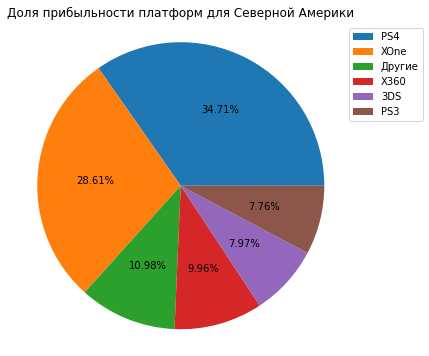

In [52]:
#Создание графика
count_na = [98.61, 81.27, 31.19, 28.30, 22.64, 22.05]
platform_na_count = ['PS4', 'XOne', 'Другие', 'X360', '3DS', 'PS3']

plt.figure(figsize=(10,6))
plt.title('Доля прибыльности платформ для Северной Америки')

plt.pie(
    count_na, autopct='%1.2f%%', radius = 1.1)
plt.legend(
    bbox_to_anchor = (1.0, 1.0), labels = platform_na_count)
plt.show()

**Вывод** 

Распределение прибыльности по платформам в Северной Америке следующее: PS4 - 34.71%, XOne - 28.61%, X360 - 9.96%, 3DS - 9.62% и PS3 - 7.76%. Общая доля иных платформ составляет 10.98%. Самой популярной платформой в Северной Америке за анализируемый период, являлась PS4, на неё приходится более трети от всей прибыльности. На втором месте по популярности идет XOne, которая всего лишь на 6% отстает от PS4. Также в топ 5 платфрм в Северной Америке присутствуют предыдущие версии указанных платформ PS3 и X360. Также стоит отметить небольшую долю которая приходится на другие платформы. Таким образом рынок Северной Америки практически поделен между платформами PS и Xbox, с небольшим перевесом в пользу PS

**Европа**

In [53]:
#Создание сводной таблицы прибыльности платформ платформ для Европы
data_eu_sales = data_period.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by = 'eu_sales',ascending=False).reset_index() 

#Вывод топ 5 платформ
data_eu_sales.head()

,platform,eu_sales
0,PS4,130.04
1,XOne,46.25
2,PS3,25.54
3,PC,17.97
4,3DS,16.12


In [54]:
#Создание функции одной строки для определения типа платформы для Европы
def platform_eu(row):
       
        if row['platform'] == 'PS3':
            return 'PS3'
        if row['platform'] == 'X360':
            return 'X360'
        if row['platform'] == 'PS4':
            return 'PS4'
        if row['platform'] == 'PC':
            return 'PC'
        if row['platform'] == '3DS':
            return '3DS'
    
        return 'Другие'

#Создание столбца с типом платформ для Европы
data_period['platform_type_eu'] = data_period.apply(platform_eu, axis=1)

In [55]:
#Создание сводной таблицы для Европы после добавления значения 'Другие'  
data_eu_sales = data_period.pivot_table(index='platform_type_eu', values='eu_sales', aggfunc='sum').sort_values(by = 'eu_sales',ascending=False).reset_index() 

#Вывод таблицы
data_eu_sales.head(6)

,platform_type_eu,eu_sales
0,PS4,130.04
1,Другие,65.52
2,PS3,25.54
3,PC,17.97
4,3DS,16.12
5,X360,15.49


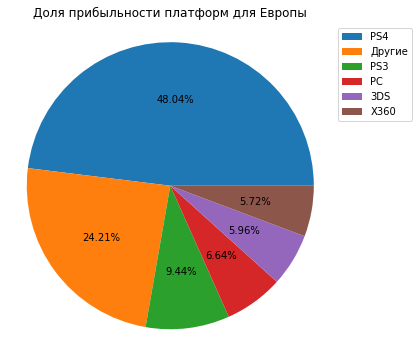

In [56]:
#Создание графика
count_eu = [130.04, 65.52, 25.54, 17.97, 16.12, 15.49]
platform_eu_count = ['PS4', 'Другие', 'PS3', 'PC', '3DS', 'X360']

plt.figure(figsize=(10,6))
plt.title('Доля прибыльности платформ для Европы')

plt.pie(
    count_eu, autopct='%1.2f%%', radius = 1.1)
plt.legend(
    bbox_to_anchor = (1.0, 1.0), labels = platform_eu_count)
plt.show()

**Вывод** 

Распределение игр по самым популярным платформам в Европе следующее: PS4 - 48.08%, PS3 - 9.44%, PC - 6.64%, 3DS - 5.96%, X360 - 5.72%. Общая доля иных платформ составляет 24.21%. Самой популярной платформой в Европе за анализируемы период являлась PS4, на которую приходится практически половина всех релизов, на втором месте по популярности предыдущие версия данной платформы, на которую приходится в 5 раза меньше релизов. Также стоит отметить, что на третьем месте по прибыльности игры для персональных компьютеров, которые по популярности обходят такие платформы как 3DS и X360. Также стоит отметить, что четверть всех релизов приходится на платформы не из топ 5. Таким образом на рынке Европы более половины всей прибыльности приходится на платформу PS и её различные версии, в остальном в Европе нет предпочтений по какой-то отдельной платформе, их много с примерно равными небольшими долями

**Япония**

In [57]:
#Создание сводной таблицы прибыльности платформ платформ для Японии
data_jp_sales = data_period.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by = 'jp_sales',ascending=False).reset_index()

#Вывод
data_jp_sales.head()

,platform,jp_sales
0,3DS,44.24
1,PS4,15.02
2,PSV,14.54
3,PS3,11.22
4,WiiU,7.31


Топ 5 прибыльных платформ для Европы - 3DS,PS3, PSP, DS, PSV

In [58]:
#Создание функции одной строки для определения типа платформы для Японии
def platform_jp(row):
       
        if row['platform'] == '3DS':
            return '3DS'
        if row['platform'] == 'PS4':
            return 'PS4'
        if row['platform'] == 'PSV':
            return 'PSV'
        if row['platform'] == 'PS3':
            return 'PS3'
        if row['platform'] == 'WiiU':
            return 'WiiU'
    
        return 'Другие'

#Создание столбца с типом платформ для Японии
data_period['platform_type_jp'] = data_period.apply(platform_jp, axis=1)


In [59]:
##Создание сводной таблицы для Японии после добавления значения 'Другие'
data_jp_sales = data_period.pivot_table(index='platform_type_jp', values='jp_sales', aggfunc='sum').sort_values(by = 'jp_sales',ascending=False).reset_index()

#Вывод 
data_jp_sales.head(6)

,platform_type_jp,jp_sales
0,3DS,44.24
1,PS4,15.02
2,PSV,14.54
3,PS3,11.22
4,WiiU,7.31
5,Другие,0.76


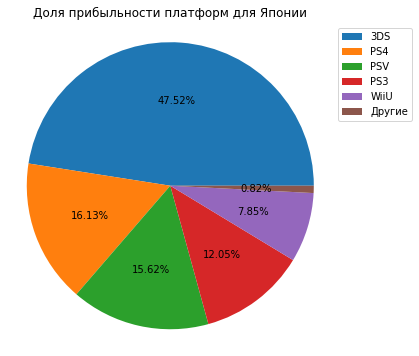

In [60]:
#Создание графика
count_jp = [44.24, 15.02, 14.54, 11.22, 7.31, 0.76]
platform_jp_count = ['3DS', 'PS4', 'PSV', 'PS3', 'WiiU', 'Другие']

plt.figure(figsize=(10,6))
plt.title('Доля прибыльности платформ для Японии')

plt.pie(
    count_jp, autopct='%1.2f%%', radius = 1.1)
plt.legend(
    bbox_to_anchor = (1.0, 1.0), labels = platform_jp_count)
plt.show()

**Вывод**

Распределение самых популярных платформ в Японии следующее: 3DS - 47.52%, PS4 - 16.13%, PSV - 15.62%, PS3 - 12.05%, WiiU - 7.85%. Общая доля иных платформ составляет 0.82%. Самой популярной платформой в Японии является 3DS, на неё приходится почти половина всей прибыльности. На втором месте находится PS4 c долей приблизительно в 3 раза меньше. Также стоит отметить популярность платформы PSV, которая занимает практически такую же долю, что и PS4, а также отмечаем наличии в топ 5 платформы PS3 и практически отсутствие платформ не из топ 5. Таким образом рынкок Японии распределен между платформами из топ 5, где практически половину занимает платформа 3DS. Также отмечаем популярность портативных консолей.

**Популярные жанры**

**Северная Америка**

In [61]:
#Создание сводной таблицы прибыльности жанров для Северной Америки
data_na_sales_genre = data_period.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by = 'na_sales',ascending=False)

#Вывод топ 5 платформ
data_na_sales_genre.head()

,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05


Топ 5 жанров для Северной Америки - Action, Shooter, Sports, Misc, Role-Playing

In [62]:
#Создание функции одной строки для определения типа жанра для Северной Америки
def genre_na(row):
       
        if row['genre'] == 'Shooter':
            return 'Shooter'
        if row['genre'] == 'Action':
            return 'Action'
        if row['genre'] == 'Sports':
            return 'Sports'
        if row['genre'] == 'Misc':
            return 'Misc'
        if row['genre'] == 'Role-Playing':
            return 'Role-Playing'
    
        return 'Другой'

#Создание столбца с жанром для Северной Америки
data_period['genre_type_na'] = data_period.apply(genre_na, axis=1)

In [63]:
#Создание сводной таблицы для Северной Америки после добавления значения 'Другой'
data_na_sales_genre = data_period.pivot_table(index='genre_type_na', values='na_sales', aggfunc='sum').sort_values(by = 'na_sales',ascending=False)

#Вывод топ 5 платформ
data_na_sales_genre.head(6)

,na_sales
genre_type_na,
Shooter,79.02
Action,72.53
Sports,46.13
Другой,37.86
Role-Playing,33.47
Misc,15.05


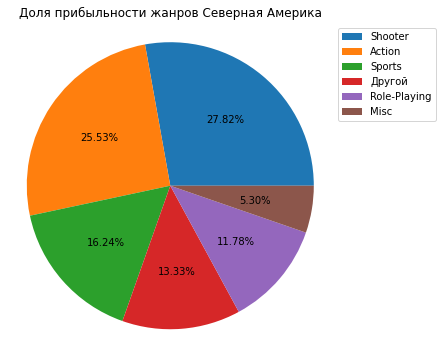

In [64]:
#Создание графика
count = [79.02, 72.53, 46.13, 37.86, 33.47, 15.05]
genre_na_count = ['Shooter', 'Action', 'Sports', 'Другой', 'Role-Playing', 'Misc']

plt.figure(figsize=(10,6))
plt.title('Доля прибыльности жанров Северная Америка')

plt.pie(
    count, autopct='%1.2f%%', radius = 1.1)
plt.legend(
    bbox_to_anchor = (1.0, 1.0), labels = genre_na_count)
plt.show()

**Вывод**

Распределение самых популярных жанров в Северной Америке следующее: Shooter - 27.82%, Action - 25,53%, Sports - 16.24%, Role-Playing - 11.78%, Misc - 5.30%. Общая доля иных жанров составляет 13.33%. Самыми популярными жанрами у пользователей в Северной Америке, являются Shooter и Action, разница в из прибыльности составляет всего 2,3%, но как мы отмечали ранее релизов для жанра Shooter значительно меньше по сравнению с жанром Action, т.е. игры жанра Shooter чаще покупают и оны выше по стоимости

**Европа**

In [65]:
#Создание сводной таблицы прибыльности жанров для Европы
data_eu_sales_genre = data_period.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by = 'eu_sales',ascending=False) 

#Вывод топ 5 платформ
data_eu_sales_genre.head()

,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


Топ 5 жанр для Европы - Action, Shooter, Sports, Role-Playing, Misc

In [66]:
#Создание функции одной строки для определения типа жанра для Европы
def genre_eu(row):
       
        if row['genre'] == 'Action':
            return 'Action'
        if row['genre'] == 'Shooter':
            return 'Shooter'
        if row['genre'] == 'Sports':
            return 'Sports'
        if row['genre'] == 'Role-Playing':
            return 'Role-Playing'
        if row['genre'] == 'Racing':
            return 'Racing'
    
        return 'Другой'

#Создание столбца с жанром для Европы
data_period['genre_type_eu'] = data_period.apply(genre_eu, axis=1)

In [67]:
#Создание сводной таблицы для Европы после добавление значений 'Другой'
data_eu_sales_genre = data_period.pivot_table(index='genre_type_eu', values='eu_sales', aggfunc='sum').sort_values(by = 'eu_sales',ascending=False) 

#Вывод топ 5 платформ
data_eu_sales_genre.head(6)

,eu_sales
genre_type_eu,
Action,74.68
Shooter,65.52
Sports,45.73
Другой,42.45
Role-Playing,28.17
Racing,14.13


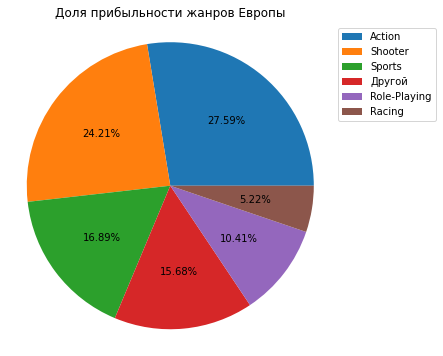

In [68]:
#Создание графика
count = [74.68, 65.52, 45.73, 42.45, 28.17, 14.13]
genre_eu_count = ['Action', 'Shooter', 'Sports', 'Другой', 'Role-Playing', 'Racing']

plt.figure(figsize=(10,6))
plt.title('Доля прибыльности жанров Европы')

plt.pie(
    count, autopct='%1.2f%%', radius = 1.1)
plt.legend(
    bbox_to_anchor = (1.0, 1.0), labels = genre_eu_count)
plt.show()

**Вывод**

Распределение самых популярных жанров в Европе следующее: Action - 27.59%, Shooter - 24,21%, Sports - 16.89%, Role-Playing - 10.41% Racing - 5.22%,. Общая доля иных жанров составляет 15.68%. В Европе схожая картина с Северной Америкой, но жанр Action чуть популярнее жанра Shooter

**Япония**

In [69]:
#Создание сводной таблицы прибыльности жанров для Японии
data_jp_sales_genre = data_period.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by = 'jp_sales',ascending=False) 

#Вывод топ 5 платформ
data_jp_sales_genre.head()

,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


Топ 5 жанров для Японии - Role-Playing, Action, Misc, Platform, Adventure

In [70]:
#Создание функции одной строки для определения типа жанра для Японии
def genre_jp(row):
       
        if row['genre'] == 'Role-Playing':
            return 'Role-Playing'
        if row['genre'] == 'Action':
            return 'Action'
        if row['genre'] == 'Fighting':
            return 'Fighting'
        if row['genre'] == 'Misc':
            return 'Misc'
        if row['genre'] == 'Shooter':
            return 'Shooter'
    
        return 'Другой'

#Создание столбца с жанром для Японии
data_period['genre_type_jp'] = data_period.apply(genre_jp, axis=1)


In [71]:
#Создание сводной таблицы для Японии, после добваления значения 'Другой'
data_jp_sales_genre = data_period.pivot_table(index='genre_type_jp', values='jp_sales', aggfunc='sum').sort_values(by = 'jp_sales',ascending=False) 

#Вывод топ 5 платформ
data_jp_sales_genre.head(6)

,jp_sales
genre_type_jp,
Role-Playing,31.16
Action,29.58
Другой,15.50
Fighting,6.37
Misc,5.61
Shooter,4.87


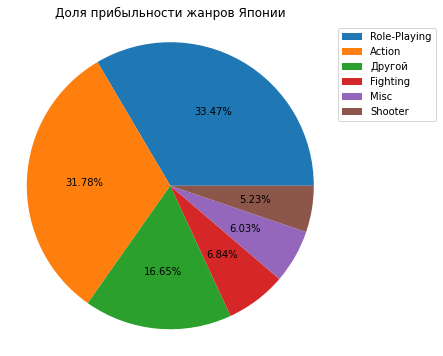

In [72]:
#Создание графика
count = [31.16, 29.58, 15.50, 6.37, 5.61, 4.87]
genre_jp_count = ['Role-Playing', 'Action', 'Другой', 'Fighting', 'Misc', 'Shooter']

plt.figure(figsize=(10,6))
plt.title('Доля прибыльности жанров Японии')

plt.pie(
    count, autopct='%1.2f%%', radius = 1.1)
plt.legend(
    bbox_to_anchor = (1.0, 1.0), labels = genre_jp_count)
plt.show()

**Вывод** 

Распределение самых популярных жанров в Японии следующее: Role-Playing - 33.47%, Action - 31.78%, Fighting - 6.84%, Misc - 6.03%, Shooter - 5,23%. Общая доля иных жанров составляет 16.65%. Самым популярным жанром в Японии является Role-Playing, на него приходится треть всей прибыльности. Следующий за ним жанр Action, отстает всего на 1,5%. Стоит отметить небольшую долю прибыльности от жанра Shooter, которая на выделяется на фоне остальных жанров, таких как Fighting или Misc. Таким образ на рынке Японии с приблизительно одинаковой долей главенствуют жанры Role-Playing и Action, остальные жанры занимают примерено одинаковые небольшие дели

**Влияние рейтинга ESRB на продажи**

ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию. Данный рейтинг предназначен для маркировки игр для США и Канады 

Ранее мы заменили пропуски в столбце 'rating' на значение No Rating (рейтинг не присвоен)

**Северная Америка**

In [74]:
#Создание сводной таблицы прибыльности для Северной Америки в зависимости от рейтинга 
data_na_sales_rating = data_period.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by = 'na_sales',ascending=False)

#Вывод топ 5 платформ
data_na_sales_rating.head()

,na_sales
rating,
M,96.42
No Rating,64.72
E,50.74
T,38.95
E10+,33.23


Топ 5 рейтинговых оценок, влияющих на продажи в Северной Америки - М (для лиц старше 17 лет), Е (для всех возрастных категорий), Т (для лиц старше 13 лет), E10+ (для лиц старше 10 лет) и No Rating (рейтинг отсутствует)

In [75]:
#Создание функции одной строки для определения рейтинга для Северной Америки
def rating_na(row):
       
        if row['rating'] == 'M':
            return 'Для лиц старше 17 лет'
        if row['rating'] == 'E':
            return 'Для всех возрастных категорий'
        if row['rating'] == 'T':
            return 'Для лиц старше 13 лет'
        if row['rating'] == 'E10+':
            return 'Для лиц старше 10 лет'
        if row['rating'] == 'No Rating':
            return 'Рейтинг отсутствует'
    
        return 'Другой'

#Создание столбца с рейтингом для Северной Америки
data_period['rating_type_na'] = data_period.apply(rating_na, axis=1)

In [76]:
#Создание сводной таблицы прибыльности для Северной Америки в зависимости от рейтинга, после добавления значения 'Другой' 
data_na_sales_rating = data_period.pivot_table(index='rating_type_na', values='na_sales', aggfunc='sum').sort_values(by = 'na_sales',ascending=False)

#Вывод топ 5 платформ
data_na_sales_rating.head(6)

,na_sales
rating_type_na,
Для лиц старше 17 лет,96.42
Рейтинг отсутствует,64.72
Для всех возрастных категорий,50.74
Для лиц старше 13 лет,38.95
Для лиц старше 10 лет,33.23


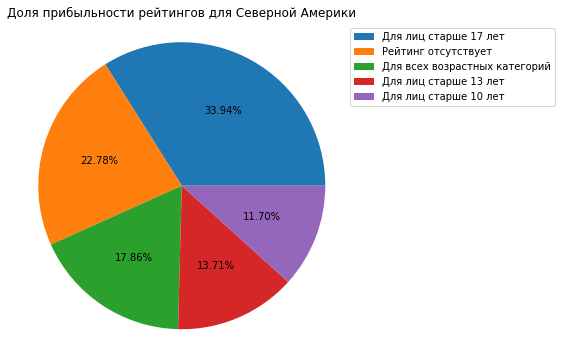

In [77]:
#Создание графика
count = [96.42, 64.72, 50.74, 38.95, 33.23]
rating_na_count = ['Для лиц старше 17 лет', 'Рейтинг отсутствует', 'Для всех возрастных категорий', 'Для лиц старше 13 лет', 'Для лиц старше 10 лет']

plt.figure(figsize=(10,6))
plt.title('Доля прибыльности рейтингов для Северной Америки')

plt.pie(
    count, autopct='%1.2f%%', radius = 1.1)
plt.legend(
    bbox_to_anchor = (1.0, 1.0), labels = rating_na_count)
plt.show()

**Вывод**

Распределение самых популярных рейтинговых оценок в Северной Америки следующее: Для лиц старше 17 лет - 33.941%, Для всех возрастных категорий - 17.86%, Для лиц старше 13 лет - 13.71%, Для лиц старше 10 лет - 11.70%. Доля игр без рейтинга - 22.78%. Самыми популярными играми в Северной Америке, являются игры с рейтингом 'Для лиц старше 17 лет' (треть всех игр), это соотносится с популярностью жанров Shooter и Action в данном регионе. Также стоит отметить, большую долю игр без рейтинга, т.е. игр, выпущенных не для данного региона. Таким образом, можно сделать вывод, что рейтинг 'Для лиц старше 17 лет' влияет на прибыльность игр в Северной Америке

**Европа**

In [78]:
#Создание сводной таблицы прибыльности для Европы в зависимости от рейтинга 
data_eu_sales_rating = data_period.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by = 'eu_sales',ascending=False)

#Вывод топ 5 платформ
data_eu_sales_rating.head()

,eu_sales
rating,
M,93.44
No Rating,58.95
E,58.06
T,34.07
E10+,26.16


Топ 5 рейтинговых оценок, влияющих на продажи в Европе - М (для лиц старше 17 лет), Е (для всех возрастных категорий),No Rating (рейтинг отсутствует), Т (для лиц старше 13 лет) и E10+ (для лиц старше 10 лет)

In [79]:
#Создание функции одной строки для определения рейтинга для Европы
def rating_eu(row):
       
        if row['rating'] == 'M':
            return 'Для лиц старше 17 лет'
        if row['rating'] == 'E':
            return 'Для всех возрастных категорий'
        if row['rating'] == 'T':
            return 'Для лиц старше 13 лет'
        if row['rating'] == 'E10+':
            return 'Для лиц старше 10 лет'
        if row['rating'] == 'No Rating':
            return 'Рейтинг отсутствует'
    
        return 'Другой'

#Создание столбца с рейтингом для Европы
data_period['rating_type_eu'] = data_period.apply(rating_eu, axis=1)

In [80]:
#Создание сводной таблицы прибыльности для Европы в зависимости от рейтинга, после добавления значений 'Другой'
data_eu_sales_rating = data_period.pivot_table(index='rating_type_eu', values='eu_sales', aggfunc='sum').sort_values(by = 'eu_sales',ascending=False)

#Вывод топ 5 платформ
data_eu_sales_rating.head(6)

,eu_sales
rating_type_eu,
Для лиц старше 17 лет,93.44
Рейтинг отсутствует,58.95
Для всех возрастных категорий,58.06
Для лиц старше 13 лет,34.07
Для лиц старше 10 лет,26.16


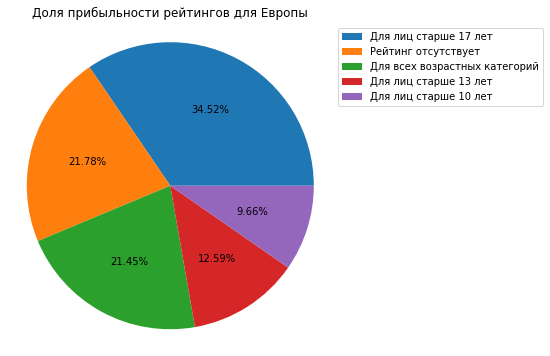

In [81]:
#Создание графика
count = [93.44, 58.95, 58.06, 34.07, 26.16]
rating_na_count = ['Для лиц старше 17 лет', 'Рейтинг отсутствует', 'Для всех возрастных категорий', 'Для лиц старше 13 лет', 'Для лиц старше 10 лет']

plt.figure(figsize=(10,6))
plt.title('Доля прибыльности рейтингов для Европы')

plt.pie(
    count, autopct='%1.2f%%', radius = 1.1)
plt.legend(
    bbox_to_anchor = (1.0, 1.0), labels = rating_na_count)
plt.show()

**Вывод**

Распределение самых популярных рейтинговых оценок в Европе следующее: Для лиц старше 17 лет - 34.52%, Для всех возрастных категорий - 21.45%, Для лиц старше 13 лет - 12.59%, Для лиц старше 10 лет - 9.66%. Доля игр без рейтинга - 21.78%. В Европе схожие показатели, как и в Северной Америке, но стоит отметить достаточно большую долю игр с рейтингом 'Для всех возрастных категорий'

**Япония**

In [82]:
#Создание сводной таблицы прибыльности для Японии в зависимости от рейтинга 
data_jp_sales_rating = data_period.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by = 'jp_sales',ascending=False)

#Вывод топ 5 платформ
data_jp_sales_rating.head()

,jp_sales
rating,
No Rating,56.90
T,14.78
E,8.94
M,8.01
E10+,4.46


Топ 5 рейтинговых оценок, влияющих на продажи в Японии - No Rating (рейтинг отсутствует), Е (для всех возрастных категорий), Т (для лиц старше 13 лет), М (для лиц старше 17 лет) и E10+ (для лиц старше 10 лет)

In [83]:
#Создание функции одной строки для определения рейтинга для Японии
def rating_jp(row):
       
        if row['rating'] == 'M':
            return 'Для лиц старше 17 лет'
        if row['rating'] == 'E':
            return 'Для всех возрастных категорий'
        if row['rating'] == 'T':
            return 'Для лиц старше 13 лет'
        if row['rating'] == 'E10+':
            return 'Для лиц старше 10 лет'
        if row['rating'] == 'No Rating':
            return 'Рейтинг отсутствует'
    
        return 'Другой'

#Создание столбца с рейтингом для Европы
data_period['rating_type_jp'] = data_period.apply(rating_jp, axis=1)

In [84]:
#Создание сводной таблицы прибыльности для Японии в зависимости от рейтинга, после добавления значения 'Другой' 
data_jp_sales_rating = data_period.pivot_table(index='rating_type_jp', values='jp_sales', aggfunc='sum').sort_values(by = 'jp_sales',ascending=False)

#Вывод топ 5 платформ
data_jp_sales_rating.head(6)

,jp_sales
rating_type_jp,
Рейтинг отсутствует,56.90
Для лиц старше 13 лет,14.78
Для всех возрастных категорий,8.94
Для лиц старше 17 лет,8.01
Для лиц старше 10 лет,4.46


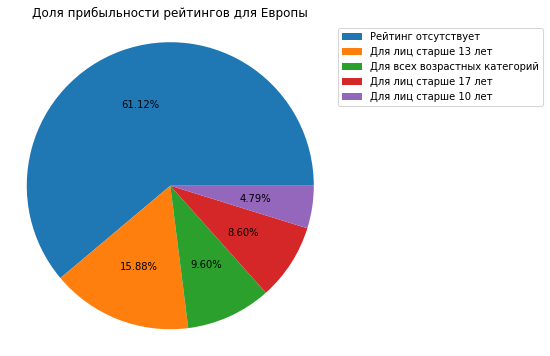

In [85]:
#Создание графика
count = [56.90, 14.78, 8.94, 8.01, 4.46]
rating_na_count = ['Рейтинг отсутствует', 'Для лиц старше 13 лет', 'Для всех возрастных категорий', 'Для лиц старше 17 лет', 'Для лиц старше 10 лет']

plt.figure(figsize=(10,6))
plt.title('Доля прибыльности рейтингов для Европы')

plt.pie(
    count, autopct='%1.2f%%', radius = 1.1)
plt.legend(
    bbox_to_anchor = (1.0, 1.0), labels = rating_na_count)
plt.show()

**Вывод**

Распределение самых популярных рейтинговых оценок в Японии следующее: Для всех возрастных категорий - 15.69%, Для лиц старше 13 лет - 13.80%, Для лиц старше 17 лет - 9.98% Для лиц старше 10 лет - 4.33%, Другой - 0.00%. Доля игр без рейтинга - 56.20%. Подавляющее большинство популярных игр в Японии не имеют рейтинга, более половины всех игр т.е. в Японии преобладают игры выпущенные не для Северной Америки, а из игр имеющих рейтинг ESRB самыми популярными являются игры 'Для всех возрастных категорий'. Игры с рейтингом 'Для лиц старше 17 лет' не выделяются на фоне остальных

**Портрет пользователей по регионам**

В результате изучения прибыльности популярности платформ, жанров и рейтинга игр по регионам за период с 2014 по 2016 года можно сделать следующие выводы:

**Северная Америка** - Рынок Северной Америки практически поделен между платформами PS и Xbox, с небольшим перевесом в пользу PS. Самыми популярными жанрами у пользователей в Северной Америке, являются Shooter и Action, но релизов для жанра Shooter значительно меньше, т.о. игры жанра Shooter чаще покупают и оны выше по стоимости. Это соотносится с тем, что самыми популярными играми в данном регионе, являются игры с рейтингом 'Для лиц старше 17 лет'. Таким образом, пользователи в Северной Америке предпочитают игры в жанрах Shooter и Action, с рейтингом 'Для лиц старше 17 лет' и выпущенных для различных версий платформ PS и Xbox

**Европа** - В отличии от Северной Америки в Европе самой популярной платформой является PS4, на которую приходится практически половина всей прибыльности. В целом распределение по жанрам и рейтингам в Европе схоже с Северной Америкой, но стоит отметить большую популярность жанров Action и игра с рейтингом '' Самыми популярными жанрами у пользователей в Европе, является Action и игры с рейтингом 'Для всех возрастных категорий'. Таким образом, пользователи в Европе предпочитают игры в жанре Action и Shooter, с рейтингом 'Для лиц старше 17 лет' и выпущенных для различных версий платформы PS

**Япония** - Самой популярной платформой в Японии является 3DS. Стоит отметить популярность портативных консолей. Самым популярным жанрами в Японии является Role-Playing и Action. Подавляющее доля прибыльности приходится на игры без рейтинга, т.е. выпущенных не для Северной Америки, а выпускаемых непосредственно в самой Японии. Таким образом, пользователи в Японии предпочитают игры, выпущенные в Японии в жанре Role-Playing и Action для платформы 3DS.



# Шаг 5. Проверка гипотез

Для проверки гипотез возьмем выбранный ранее актуальный период после 2009 года

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Необходимо проверить гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, т.е. проверяются две независимые совокупности, таким образом мы можем применить метод сравнения равенства средних двух генеральных совокупностей - scipy.stats.ttest_ind(). Нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC равны, Альтернативная гипотеза - средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [86]:
#Создание среза по рейтину пользователей для платформы Xbox One 
xone_user_score = data_period[data_period['platform']=='XOne']['user_score']

#Создание среза по рейтину пользователей для платформы PC 
pc_user_score = data_period[data_period['platform'] == 'PC']['user_score']

In [87]:
#Проверка гипотезы
alpha = 0.05 

results = st.ttest_ind(xone_user_score.dropna(),pc_user_score.dropna())


print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


In [88]:
#Вывод среднего значения оценки пользователей для платформы Xone
xone_user_score.mean()

6.594545454545454

In [89]:
#Вывод среднего значения оценки пользователей для платформы PC
pc_user_score.mean()

6.298360655737704

**Вывод**

Вывод После проверки гипотезы с помощью метода scipy.stats.ttest_ind() мы получили результат - Не отвергаем нулевую гипотезу (p-значение: 0.98), в пользу альтернативной. Таким образом средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**Средние пользовательские рейтинги жанров Action и Sports разные**

Необходимо проверить гипотезу, что средние пользовательские рейтинги жанров Action и Sports разные, т.е. проверяются две независимые совокупности, таким образом мы можем применить метод сравнения равенства средних двух генеральных совокупностей - scipy.stats.ttest_ind(). Нулевая гипотеза - средние пользовательские рейтинги жанров Action и Sports равны, Альтернативная гипотеза - средние пользовательские рейтинги жанров Action и Sports разные.

In [90]:
#Создание среза по рейтину пользователей для платформы Xbox One 
action_user_score = data_period[data_period['genre']=='Action']['user_score']

#Создание среза по рейтину пользователей для платформы PC 
sports_user_score = data_period[data_period['genre'] == 'Sports']['user_score']

In [91]:
#Проверка гипотезы
alpha = 0.05 

results = st.ttest_ind(action_user_score.dropna(),sports_user_score.dropna())


print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


In [92]:
#Вывод среднего значения оценки пользователей для жанра Action
action_user_score.mean()

6.760606060606061

In [93]:
#Вывод среднего значения оценки пользователей для жанра Sports
sports_user_score.mean()

5.225196850393701

**Вывод**

После проверки гипотезы с помощью метода scipy.stats.ttest_ind() мы получили результат - отвергаем нулевую гипотезу (p-значение: 7.839124224330309e-19), в пользу альтернативной. Таким образом средние пользовательские рейтинги жанров Action и Sports разные.

**Вывод по проверке гипотез**

После проверки гипотез за выбранный ранее актуальный период после 2009 года с помощью метода scipy.stats.ttest_ind() для двух независимых выборок, получили результат о принятии гипотез что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, а средние пользовательские рейтинги жанров Action и Sports разные

# Общий вывод

Нами проведен анализ данных интернет-магазина «Стримчик». На этапе предобработки данных было проанализировано содержание предоставленной таблицы, название столбцов, было приведено к 'змеиному' регистру. В столбцах, где была небольшая доля пропусков, они были удалены, а в столбце 'rating' были заменены на значение 'No Rating'. В столбце 'user_score', было обнаружено значение tbd, используемое для обозначения неизвестной даты выхода. Значение tbd, было заменено на значение NaN. Пропуски в столбцах 'critic_score' и 'user_score' не заполнялись. Дубли по строкам обнаружены не были, но были выявлены неявные дубли, которые были удалены. После предобработки данных число строк в таблице сократилось на 1.6%.

Далее были проанализировано количество игр, выпускаемых в каждые годы. Данные в таблице предоставлены с 1980 года. За период с 2003 по 2007 год было выпущено столько же игр как за предыдущие 23 года и ещё столько же игр было выпущено за период с 2007 по 2010 год. Пик выпускаемых игр приходится на период 2008-2009 года. В 2012 году наблюдается резкий спад в количестве релизов. Это можно объяснить появлением новых операционных систем (ios, android) и устройств, работающих на этих системах (смартфоны, планшеты)

Далее была проанализирована прибыльность по платформам. Самой прибыльной платформой за все время является PS2, заметно выделяясь на фоне остальных, можно утверждать, что появление PS2 определило развитие индустрии видео игр. Затем идут X360, PS3, Wii, DS, PS. Проанализировав Топ 6 платформ по прибыльности были выявлены общие тенденции. На примере платформ PS можно проследить за какой появлялись новые версии платформы. PS появилась 1994, PS2 в 2000, PS3 в 2006, таким образом срок появления новых платформ составляет 7 лет, новая версия платформы выходит, в момент, когда начинается снижение прибыльности предыдущей версии, но прибыльность ещё достаточно высокая, новая версия перетягивает на себя часть прибыли предыдущей. Средний срок существования платформы приблизительно составляет 10 лет; на следующий год после выхода новой платформы наблюдается значительный рост прибыльности; период стабильно высокой прибыльности составляет 5 лет, после чего начинается снижение.

Учитывая это, для для дальнейшего анализа был выбран период после 2013 года, т.е. период высокой прибыльности самых новых версий популярных платформ

Далее была проанализирована прибыльность по платформам за выбранный период. Самая высокая прибыль у PS4. Следом идут XOne и 3DS. Также стоит отметить, что в топ 5 по прибыльности входят предыдущие версии платформ PS и Xbox. Для дальнейшего анализа были выбраны новые последние версии популярных платформ, по которым наблюдается высокая прибыльность. Таким образом дальнейший анализ проводился по платформам PS4, XOne, 3DS, WiiU, PC, PSV

Самое высокое медианное значение прибыльности у XOne, т.е. игры для платформы прибыльнее остальных. Медианное значение PS4и WiiU приблизительно равны, но стоит отметить, что у WiiU меньше всего выбросов, а также меньшее количество продаж, т.е. игры для WiiU самые дорогие. PS4 на первом месте по количеству продаж, следом идет PSV 

С помощью коэффициента Пирсона установлено, что оценки пользователей не оказывают никакого влияния на прибыльность таких платформ как PS4, XOne, PC, но вместе с тем оценки критиков слабо, но влияют на прибыльность данных платформ. На платформа PSV оценки критиков слабее влияют на прибыльность. Платформа WiiU выделяется на фоне остальных - оценка критиков влияет на прибыльность также, как и у остальных, но оценки пользователей влияют на прибыльность больше чем оценки критиков

Жанр Shooter сильно выделяется на фоне остальных жанров. Его медианное значение самое высокое, даже не смотря на то, что количество представленных игр в данном жанре т.е. в данный жанр очень популярен. Жанр Action лидирует по продажам, но это не означает, что он лидирует по прибыльности

Затем были составлены портреты пользователей по регионам Северная Америка, Европа и Япония. В целом портреты пользователей в Европе и Северной Америке похожи они предпочитают игры жанра Action  и Shooter с соответствующим рейтингом 'Для лиц старше 17 лет'. В Северной Америке рынок фактически поделен платформами Xone и PS4, а в Европе PS4 занимает практически половину рынка. В Япония самой популярной платформой там является 3DS, а также популярны портативные консоли PSV. Из игр в Японии предпочитают жанр Role-Playing и Action выпущенные непосредственно там же.

Так же на основании имеющихся данных проверили гипотезы о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые (Гипотеза 1); Средние пользовательские рейтинги жанров Action и Sport sразные (Гипотеза 2). После проверки гипотез с помощью метода scipy.stats.ttest_ind(), для двух независимых выборок, получили результат о принятии гипотез что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, а средние пользовательские рейтинги жанров Action и Sports разные.

Таким образом, после проведения исследования можно сделать вывод, что выявлены закономерности, определяющие успешность игры, но они имеют свои особенности по регионам. При проведении рекламной компании в Северной Америке стоит сосредоточится на играх жанра Action и Shooter с рейтингом 'Для лиц старше 17 лет' и платформ PS4 и XOne, т.к. они практически делят рынок пополам, но стоит обратить внимание, что игры жанра Shooter более прибыльны, а платформа XOne прибыльнее чем PS4 в данном регионе. При проведении рекламной компании стоит сосредоточится только на платформе PS4, т.к. на неё приходится больше половины доли рынка, а по жанрам и рейтингу такие же рекомендации, как и для Северной Америке. В Японии рекламную компанию стоит построить на местных играх, выпущенных в жанрах Role-Playing и Action для платформы 3DS. Так же стоит принять во внимание, что оценки критиков слабо влияют на продажи, а оценки пользователей вообще не влияют


